/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


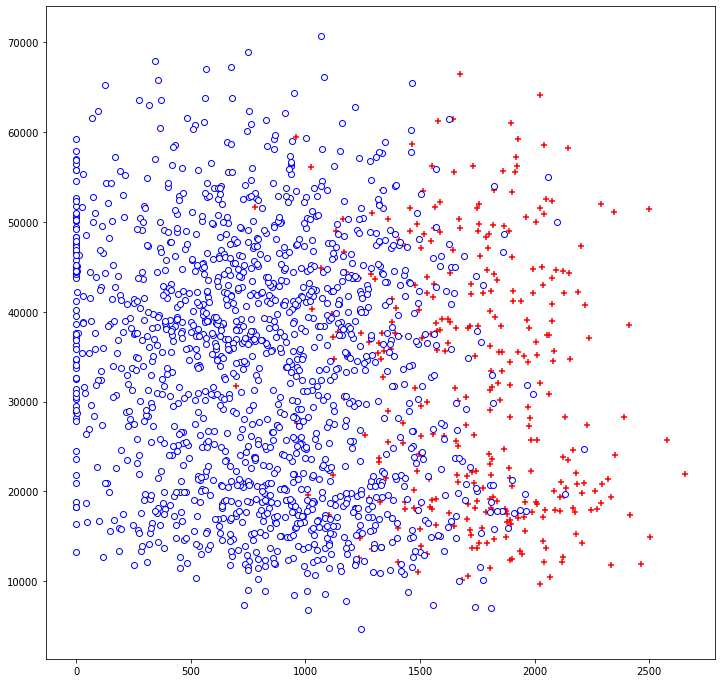

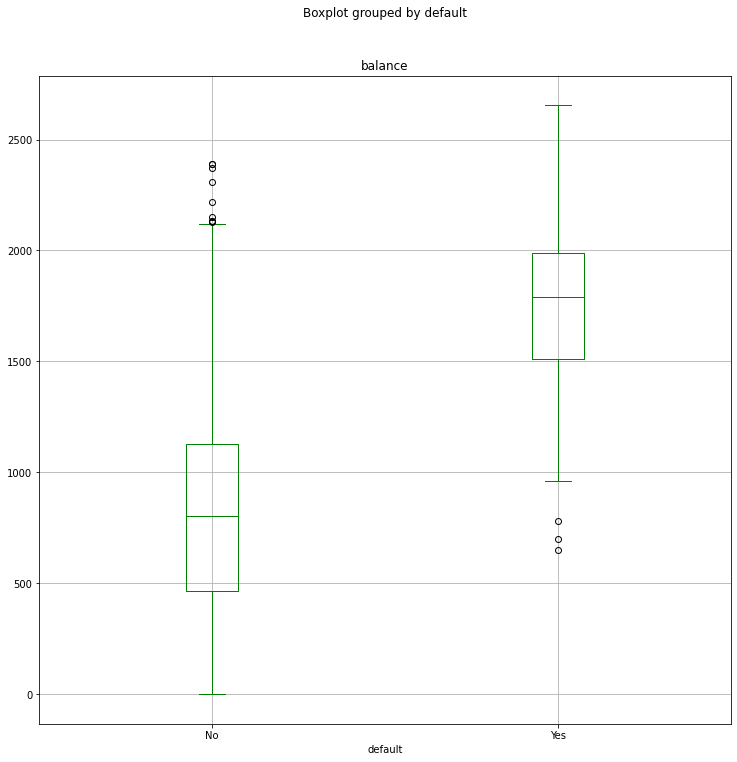

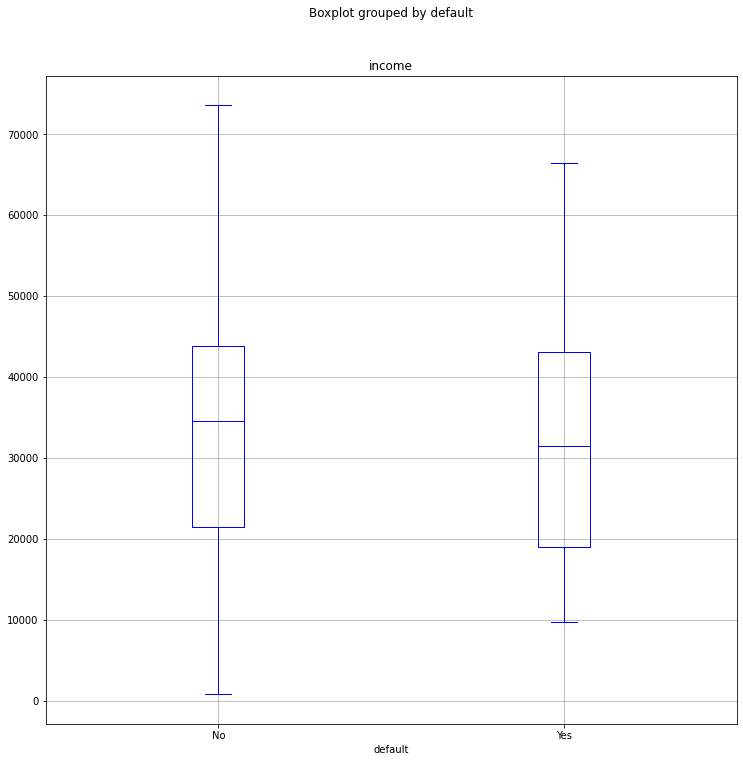

In [ ]:
import pandas as pd

df = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/DefaultData.xlsx')

df = df.drop(['Unnamed: 0'],axis=1) #Quitar una columna

df_Yes = df[df.default == 'Yes'] #se toma los datos de df que sean igual a 'yes'
df_No = df[df.default == 'No'].sample(frac=0.15) #se toma una muestra del 15% de los datos iguales a 'no'

df1 = df_No.append(df_Yes) # se unen los datos datos 'yes' y 'no' en un mismo DataFrame

#GRAFICAS
import matplotlib.pyplot as plt
plt.figure(1,figsize=(12,12))
plt.clf()
plt.scatter(df1[df1.default=='Yes'].balance, df1[df1.default=='Yes'].income, color='r', marker='+')
plt.scatter(df1[df1.default=='No'].balance, df1[df1.default=='No'].income, facecolors = 'white', edgecolors='blue')

#GRAFICAS DE CAJAS
box = df.boxplot(column = 'balance',by='default',figsize=(12,12),color='green')
box2 = df.boxplot(column = 'income',by='default',figsize=(12,12),color='blue')


In [ ]:
#REGRESIÓN LOGÍSTICA SIMPLE CON STATSMODELS
import pandas as pd

df = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/DefaultData.xlsx')
df['default_dummy']=df.default.factorize()[0]
df['studen_dummy']=df.student.factorize()[0]
print(df)
y = df['default_dummy']

import statsmodels.api as stm
import statsmodels.api as smf

X=stm.add_constant(df.balance) #Agrega una columna de constantes para multiplicar 1*balace
print(X)

model = smf.Logit(y,X).fit()
print(model.summary())

      Unnamed: 0 default student  ...       income  default_dummy  studen_dummy
0              1      No      No  ...  44361.62507              0             0
1              2      No     Yes  ...  12106.13470              0             1
2              3      No      No  ...  31767.13895              0             0
3              4      No      No  ...  35704.49394              0             0
4              5      No      No  ...  38463.49588              0             0
...          ...     ...     ...  ...          ...            ...           ...
9995        9996      No      No  ...  52992.37891              0             0
9996        9997      No      No  ...  19660.72177              0             0
9997        9998      No      No  ...  58636.15698              0             0
9998        9999      No      No  ...  36669.11236              0             0
9999       10000      No     Yes  ...  16862.95232              0             1

[10000 rows x 7 columns]
      const   

In [3]:
#REGRESIÓN LOGÍSTICA SIMPLE CON SKLEARN

import sklearn.linear_model as sklearn
import numpy as np
import pandas as pd


df = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/DefaultData.xlsx')

df['default_dummy']=df.default.factorize()[0]
df['studen_dummy']=df.student.factorize()[0]

y = df['default_dummy']
x_train = df.balance.values.reshape(-1,1) #Sklearn no ocupa multiolicar la columna balance por constantes

clf=sklearn.LogisticRegression(solver='newton-cg')
clf.fit(x_train,y)

""" 
        H0: B1 = 0 La probabilidad de deafult no depende de balance, indica que no hay relación
        H1: B1 != 0 La probabilidad de deafult si depende de balance
        En este caso se rechaza la hipotesis nula, ya que B1 = 0.0054. La correlación es significativa con el valor P = 0, es decir que 
        exixste evidencia sufuciente para rechazar la hipótesis nula por lo que existe una asociación entre el balance y la probabilidad de default.
"""

print('classes: ', clf.classes_)
print('coefficients: ', clf.coef_ ) #es el incremento del balance asociado con los logit de default por 0.005 unidades 
print('Intercept: ',clf.intercept_)

B0 = clf.intercept_
B1 = clf.coef_ 

#La probabilidad de que alguna persona falle si tiene un balance de 1000 será menor al 1%:
X=2000

PrX=(np.exp(B0+B1*X))/(1+np.exp(B0+B1*X))
PrX = PrX[0][0]
print(PrX)
PrX=PrX*100
PrX = np.round(PrX,decimals=2)

print(PrX,'%')

"""
      Si la frontera de decición que se elige es de 0.5, los valores de X que dan como resultado un valor de Pr mayores a 0.5, 
      serán clasificados como que sí van a fallar su  pago. Para x=2000, Pr =0.5857, significa que este cliente sí fallará su pago.
"""

#SKLERN PREDICT

"""
     En x_train estan los valores de default que dicen si la persona fallo o no fallo realmente en su pago, si introducen estos valores para 
     comparar los valres reales con los que arroja el modelo.
"""
Prediccion = clf.predict(x_train) 
real = df['default_dummy']
Prediccion=Prediccion.tolist()
real = real.to_list()


valPr=clf.predict_proba(x_train) #valores de probabilidades para el conujto balance real

dfVal = pd.DataFrame(valPr)
clf.predict_proba([[2000]]) #out: array([[0.41423104, 0.58576896]])
print(dfVal)

No = dfVal[1]
print(No)
dfReal = df['default']

predi = []
cuentaSi = 0
cuentaNo = 0
frontDeci = 0.2
for n in No:
  if n<frontDeci:
    predi.append('No')
    cuentaNo +=1
  if n>= frontDeci:
    predi.append('Yes')
    cuentaSi +=1
  
CuentRealNo=0
CuentRealSi=0
for t  in dfReal:
  if t == 'No':
    CuentRealNo +=1
  else:
    CuentRealSi +=1


countSkLNo =0
countSkLSi =0

for k in Prediccion:
  if k == 0:
    countSkLNo +=1
  else:
    countSkLSi +=1

"""
for z in range(len(predi)):
  print('>>predice<<: ',predi[z], '   >>Real<<; ',dfReal[z])

"""
"""
No = y_prob
dfReal = dfW['Direction']

predi = []
cuentaSi = 0
cuentaNo = 0
frontDeci = 0.2
for n in No:
  if n<frontDeci:
    predi.append('Up')
    cuentaNo +=1
  if n>= frontDeci:
    predi.append('Down')
    cuentaSi +=1
  
CuentRealNo=0
CuentRealSi=0
for t  in dfReal:
  if t == 'Up':
    CuentRealNo +=1
  else:
    CuentRealSi +=1


countSkLNo =0
countSkLSi =0

for k in y_prob:
  if k == 0:
    countSkLNo +=1
  else:
    countSkLSi +=1
print('Si: ', cuentaSi, '  No: ', cuentaNo, 'frontera de ',frontDeci)
print('Si: ', CuentRealSi, '  No: ', CuentRealNo, 'valores reales')
"""
print('Si: ', cuentaSi, '  No: ', cuentaNo, 'frontera de ',frontDeci)
print('Si: ', CuentRealSi, '  No: ', CuentRealNo, 'valores reales')
print('Si: ', countSkLSi, '  No: ', countSkLNo, 'frontera de SKL')


classes:  [0 1]
coefficients:  [[0.00549892]]
Intercept:  [-10.65133019]
0.5857693444932406
58.58 %
             0         1
0     0.998694  0.001306
1     0.997887  0.002113
2     0.991405  0.008595
3     0.999566  0.000434
4     0.998223  0.001777
...        ...       ...
9995  0.998817  0.001183
9996  0.998474  0.001526
9997  0.997533  0.002467
9998  0.883240  0.116760
9999  0.999929  0.000071

[10000 rows x 2 columns]
0       0.001306
1       0.002113
2       0.008595
3       0.000434
4       0.001777
          ...   
9995    0.001183
9996    0.001526
9997    0.002467
9998    0.116760
9999    0.000071
Name: 1, Length: 10000, dtype: float64
Si:  462   No:  9538 frontera de  0.2
Si:  333   No:  9667 valores reales
Si:  142   No:  9858 frontera de SKL


In [ ]:
#Regrecion logistica con variable culitativa

import statsmodels.api as stm
import statsmodels.api as smf
import numpy as np

df = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/DefaultData.xlsx')
df['student_dummy']=df.student.factorize()[0]
df['default_dummy']=df.default.factorize()[0]

y = df['default_dummy']

X = stm.add_constant(df.student_dummy)
model = smf.Logit(y.ravel(),X).fit()

print(model.summary())

#X=0 #No es estudiente
X=1 #si es estudiente
B0 = -3.5041
B1 = 0.4049

PrX=(np.exp(B0+B1*X))/(1+np.exp(B0+B1*X))
#PrX = PrX[0][0]
# print(PrX)
# PrX=PrX*100
# PrX = np.round(PrX,decimals=2)

print(PrX)
print(df)

Optimization terminated successfully.
         Current function value: 0.145434
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9998
Method:                           MLE   Df Model:                            1
Date:                Wed, 05 May 2021   Pseudo R-squ.:                0.004097
Time:                        23:07:30   Log-Likelihood:                -1454.3
converged:                       True   LL-Null:                       -1460.3
Covariance Type:            nonrobust   LLR p-value:                 0.0005416
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -3.5041      0.071    -49.554      0.000      -3.643      -3.366
student_dummy     0.

In [ ]:
#Regresión logística multiple con statsmodel
import statsmodels.api as stm
import statsmodels.api as smf
import numpy as np
df = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/DefaultData.xlsx')

df['student_dummy']=df.student.factorize()[0]
df['default_dummy']=df.default.factorize()[0]
y = df['default_dummy']
print(df)
df['income_k'] = df.income/1000 # se divide entre 1000 para hacer más pequños los valores
x = stm.add_constant(df[['balance','income_k','student_dummy']]) #Nuevo DF multiplicado por una constante

print(x)
model = smf.Logit(y,x).fit()
print(model.summary())

"""
   Income_k tiene un valor de probabilidad diferente de 0 (0.712), quiere decirt que no existe evididencia suficiente para rechazar
   la hipótesis nula, la hipotesis nula dice que Bn = 0, No hay una relacion significativa
   
"""

      Unnamed: 0 default student  ...       income  student_dummy  default_dummy
0              1      No      No  ...  44361.62507              0              0
1              2      No     Yes  ...  12106.13470              1              0
2              3      No      No  ...  31767.13895              0              0
3              4      No      No  ...  35704.49394              0              0
4              5      No      No  ...  38463.49588              0              0
...          ...     ...     ...  ...          ...            ...            ...
9995        9996      No      No  ...  52992.37891              0              0
9996        9997      No      No  ...  19660.72177              0              0
9997        9998      No      No  ...  58636.15698              0              0
9998        9999      No      No  ...  36669.11236              0              0
9999       10000      No     Yes  ...  16862.95232              1              0

[10000 rows x 7 columns]
  

'\n   Income_k tiene un valor de probabilidad diferente de 0 (0.712), quiere decirt que no existe evididencia suficiente para rechazar\n   la hipótesis nula, la hipotesis nula dice que Bn = 0, No hay una relacion significativa\n   \n'

In [ ]:
#Regresión logística multiple con sklearn
import sklearn.linear_model as sklearn
import numpy as np

df = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/DefaultData.xlsx')
df['income_k'] = df.income/1000 # se divide entre 1000 para hacer más pequños los valores

df['student_dummy']=df.student.factorize()[0]
df['default_dummy']=df.default.factorize()[0]

y = df['default_dummy']

x_train= df[['balance','income_k','student_dummy']].values #así lo requiere en formato array con las tres caracteristicas

clf.fit(x_train,y);

print('Intercept: ', clf.intercept_)
print('Coeficients: ', clf.coef_)

A= clf.predict_proba([[729.5264,44.36163,0]])
print('ejem' ,A)


Intercept:  [-10.90180131]
Coeficients:  [[ 0.00573061  0.00396164 -0.61257018]]
ejem [[0.99856539 0.00143461]]
